### Notebook to train the background Kernel Density Estimates for Bayesian inference 

In [6]:
%matplotlib inline
from sklearn.neighbors.kde import KernelDensity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [7]:
#read in the combined photometric data:
catalog = pd.read_csv('ngvs_bg1_phot_combined.csv')

### Apply some appropriate cuts to the data to select out only point sources 

In [8]:
#only use data selcted with all three filters with no flags
all_detected = (catalog['g_mag'] < 90) & (catalog['r_mag'] < 90) & (catalog['i_mag'] < 90) & \
    (catalog['g_flags'] < 1) & (catalog['r_flags'] < 1) & (catalog['i_flags'] < 1)

all_detections = catalog.ix[all_detected,:]


In [9]:
#also need to correct for FG extinction. Take values from NASA NED:
fg_g = 0.066
fg_r = 0.045
fg_i = 0.034

all_detections ['g_mag'] = all_detections['g_mag'] - fg_g
all_detections ['r_mag'] = all_detections['r_mag'] - fg_r
all_detections ['i_mag'] = all_detections['i_mag'] - fg_i

/Users/zjennings/anaconda/envs/astro/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zjennings/anaconda/envs/astro/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zjennings/anaconda/envs/astro/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [16]:
#now, cut what we think are extended sources from this catalog using the filter with the best seeing
fwhm_max = 3.5
fwhm_min = 2.5

size_1 = all_detections.ix[(all_detections['i_fwhm'] < 3.1) & (all_detections['i_mag'] < 23) & \
                           (all_detections['i_mag'] > 18) & (all_detections['i_fwhm'] > 2.5) & \
                           ((all_detections['g_mag'] - all_detections['i_mag']) < 1.5) & \
                           ((all_detections['g_mag'] - all_detections['i_mag']) > 0.0) & \
                           ((all_detections['r_mag'] - all_detections['i_mag']) < 1.0) & \
                           ((all_detections['r_mag'] - all_detections['i_mag']) > -0.5),:]
                           #(all_detections['g_fwhm'] < 5.0),:]
                          # (all_detections['r_fwhm'] < 4.5) & \
                          # (all_detections['g_fwhm'] < 5.0),:]


size_2 = all_detections.ix[(all_detections['i_fwhm'] > 2.5) & (all_detections['i_fwhm'] < 3.0),:]
size_3 = all_detections.ix[(all_detections['i_fwhm'] > 3.0) & (all_detections['i_fwhm'] < 3.5),:]
size_4 = all_detections.ix[(all_detections['i_fwhm'] > 3.5) & (all_detections['i_fwhm'] < 4.),:]
size_5 = all_detections.ix[(all_detections['i_fwhm'] > 4.) & (all_detections['i_fwhm'] < 4.5),:]
size_6 = all_detections.ix[(all_detections['i_fwhm'] > 4.5),:]



(2, 6)

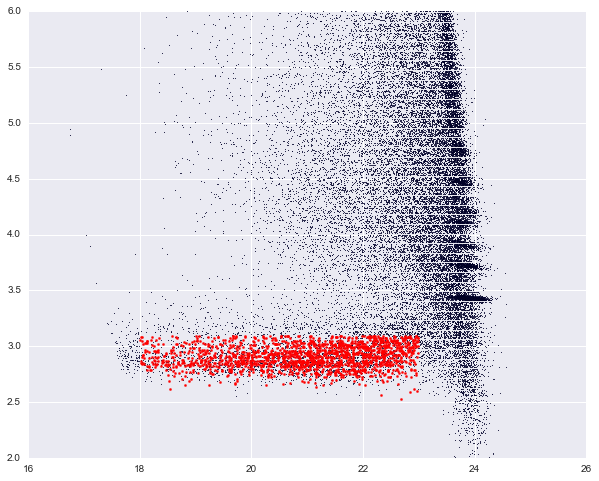

In [17]:
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(all_detections['i_mag'],all_detections['i_fwhm'],s=0.5)
ax.scatter(size_1['i_mag'],size_1['i_fwhm'],s=5,color='red')
ax.set_xlim(16,26)
ax.set_ylim(2,6)

(-0.3, 0.8)

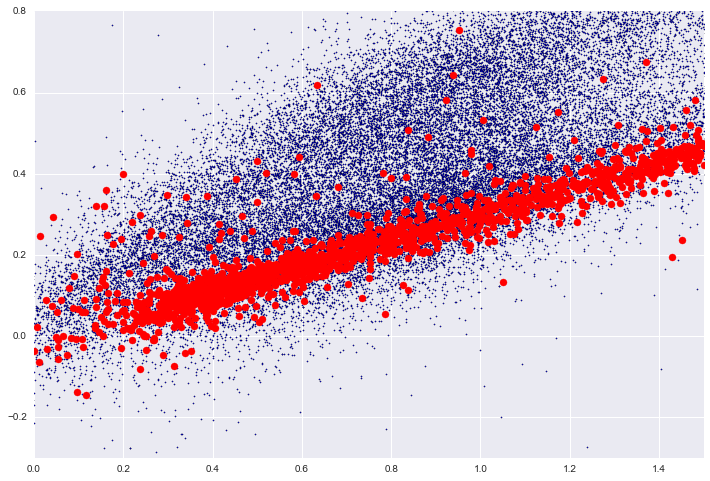

In [18]:
fig,ax = plt.subplots(figsize=(12,8))


ax.scatter(all_detections['g_mag'] - all_detections['i_mag'],\
            all_detections['r_mag'] - all_detections['i_mag'],s=1.5)
'''
ax.scatter(size_5['g_mag'] - size_5['i_mag'],\
            size_5['r_mag'] - size_5['i_mag'],s=1.5,color='blue')
ax.scatter(size_4['g_mag'] - size_4['i_mag'],\
            size_4['r_mag'] - size_4['i_mag'],s=1.5,color='green')
ax.scatter(size_3['g_mag'] - size_3['i_mag'],\
            size_3['r_mag'] - size_3['i_mag'],s=1.5,color='yellow')
'''
#ax.scatter(size_2['g_mag'] - size_2['i_mag'],\
#            size_2['r_mag'] - size_2['i_mag'],s=1.5,color='red')
ax.scatter(size_1['g_mag'] - size_1['i_mag'],\
            size_1['r_mag'] - size_1['i_mag'],s=50,color='red')

ax.set_xlim(-0.0,1.5)
ax.set_ylim(-0.3,0.8)

(-0.5, 2)

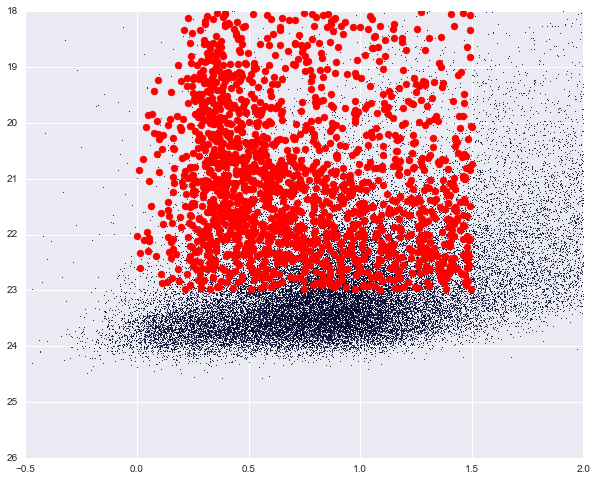

In [19]:
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(all_detections['g_mag'] - all_detections['i_mag'],all_detections['i_mag'],s=0.5)
ax.scatter(size_1['g_mag'] - size_1['i_mag'],size_1['i_mag'],s=50,color='red')
ax.set_ylim(26,18)
ax.set_xlim(-0.5,2)

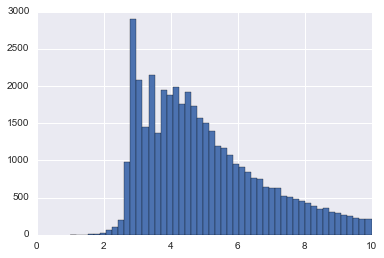

In [20]:
hist = plt.hist(all_detections['i_fwhm'],bins=50,range=(1,10))

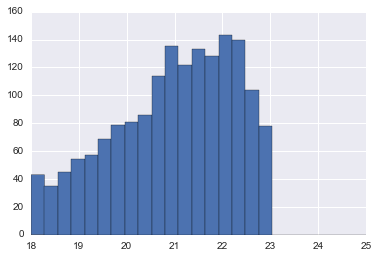

In [21]:
hist = plt.hist(size_1['i_mag'],bins=25,range=(18,25))

In [22]:
extended = (all_detections['i_fwhm'] > fwhm_max)
extended_sources = all_detections.ix[extended,:]

(-0.5, 1.0)

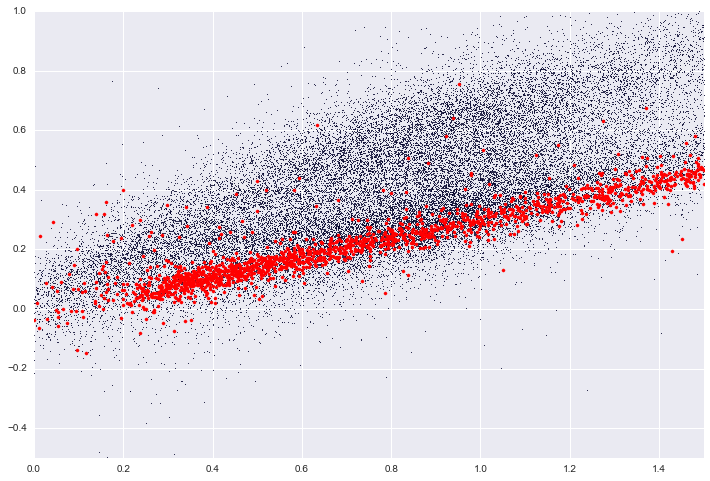

In [23]:
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(all_detections['g_mag'] - all_detections['i_mag'],\
            all_detections['r_mag'] - all_detections['i_mag'],s=0.5)

ax.scatter(size_1['g_mag'] - size_1['i_mag'],\
            size_1['r_mag'] - size_1['i_mag'],s=10,color='red')

#ax.scatter(extended_sources['g_mag'] - extended_sources['i_mag'],\
#            extended_sources['r_mag'] - extended_sources['i_mag'],s=2.0,color='red')

#ax.scatter(sized_data['g_mag'] - sized_data['i_mag'],\
#            sized_data['r_mag'] - sized_data['i_mag'],s=2.0,color='green')
ax.set_xlim(0.,1.5)
ax.set_ylim(-0.5,1.0)

(array([  39.,   35.,   38.,   40.,   56.,   47.,   69.,   72.,   71.,
          81.,   89.,  111.,  130.,  100.,  127.,  111.,  128.,  126.,
          91.,   85.]),
 array([ 18.01215,  18.26106,  18.50997,  18.75888,  19.00779,  19.2567 ,
         19.50561,  19.75452,  20.00343,  20.25234,  20.50125,  20.75016,
         20.99907,  21.24798,  21.49689,  21.7458 ,  21.99471,  22.24362,
         22.49253,  22.74144,  22.99035]),
 <a list of 20 Patch objects>)

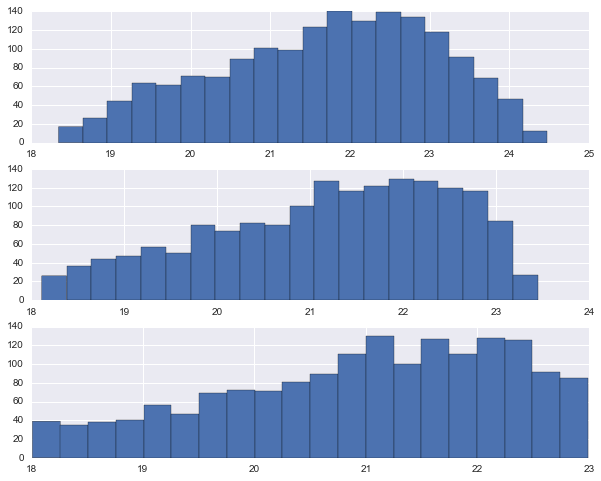

In [24]:
fig,ax = plt.subplots(3,1,figsize=(10,8))
bins=20
ax[0].hist(size_1['g_mag'],bins=bins)
ax[1].hist(size_1['r_mag'],bins=bins)
ax[2].hist(size_1['i_mag'],bins=bins)

In [25]:
gi = size_1['g_mag'] - size_1['i_mag']
ri = size_1['r_mag'] - size_1['i_mag']

In [26]:
train_data = np.vstack([gi,ri]).T

In [27]:
#train a 2D kernel density estimate
kd = KernelDensity(bandwidth=0.1)
kd.fit(train_data)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.1, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

### Now that basic KDE is trained, use some simple CV searches to find best bandwidth parameter 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
kde_cv = KernelDensity()
parameters = {'bandwidth':[0.01,0.02,0.03,0.04,0.05,0.06,0.07]}

clf = GridSearchCV(kde_cv, parameters, cv=5)
clf.fit(train_data)

GridSearchCV(cv=5, error_score='raise',
       estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bandwidth': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [29]:
for (params,mean_score) in zip(clf.cv_results_['params'],clf.cv_results_['mean_test_score']):
    print(params,mean_score)
    
print(clf.best_estimator_)

{'bandwidth': 0.01} 150.545032132
{'bandwidth': 0.02} 429.466396947
{'bandwidth': 0.03} 453.679313477
{'bandwidth': 0.04} 435.969740505
{'bandwidth': 0.05} 408.866494749
{'bandwidth': 0.06} 379.430393423
{'bandwidth': 0.07} 350.094789455
KernelDensity(algorithm='auto', atol=0, bandwidth=0.03, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)


In [30]:
X, Y = np.meshgrid(np.arange(0,1.5,0.01),np.arange(-0.5,1.0,0.01))

xy = np.vstack([X.ravel(), Y.ravel()]).T

In [31]:
#train a 2D kernel density estimate
kd = KernelDensity(bandwidth=0.03)
kd.fit(train_data)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.03, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [32]:
scores=np.exp(kd.score_samples(xy))
Z = scores.reshape(X.shape)
levels = np.linspace(0, Z.max(), 25)


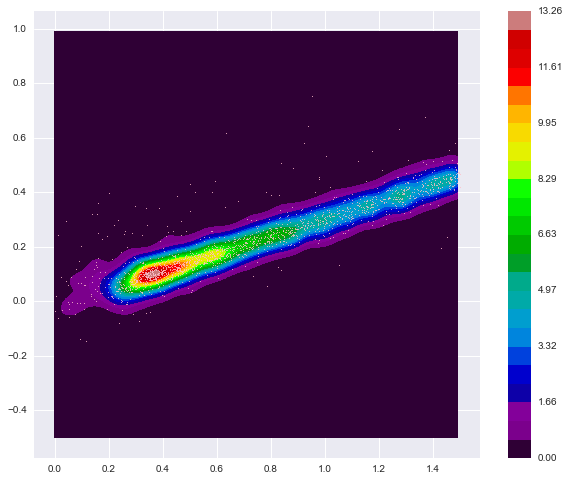

In [35]:
fig,ax = plt.subplots(figsize=(10,8))
contour = ax.contourf(X, Y, Z, levels=levels, cmap=plt.cm.spectral)
ax.scatter(size_1['g_mag'] - size_1['i_mag'],\
            size_1['r_mag'] - size_1['i_mag'],s=0.5,color='pink')
plt.colorbar(contour)

#plt.scatter(n3115_good['g_mag'] - n3115_good['i_mag'],n3115_good['r_mag'] - n3115_good['i_mag']+0.04,s=10,color='blue')

In [55]:
import pickle as p

In [56]:
with open("ngvs_bg_1_trimmed_kde.p", "wb") as output_file:
    p.dump(kd, output_file)

In [57]:
n3115 = pd.read_csv('../n3115/n3115_pt_sources_jacob.csv')
n3115_good = n3115[((n3115['g_mag'] - n3115['i_mag']) < 1.5) & ((n3115['g_mag'] - n3115['i_mag']) > 0.0) &
                   ((n3115['r_mag'] - n3115['i_mag']) < 1.0) & ((n3115['r_mag'] - n3115['i_mag']) > -0.5)]